In [1]:
import sympy
from sympy.physics.vector import dynamicsymbols

import sympy_utils
from sympy_utils import short_latex, ShortLatexPrinter, matsym, vec, dynvec, SympyDumpable

import model
import algorithms

sympy.init_session(latex_printer=short_latex)
# sympy.init_session()

IPython console for SymPy 1.3 (Python 3.7.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [2]:
m1 = model.define_full_1()
m2 = model.define_full_2()

In [3]:
m1.show_pfaff()

⎡-cos(θ₀(t))  -sin(θ₀(t))   0    0   R⋅cos(φ₁(t))  -R⋅sin(φ₁(t))⋅cos(θ₁(t))  0
⎢                                                                             
⎢sin(θ₀(t))   -cos(θ₀(t))   0    -R       0             -R⋅sin(θ₁(t))        0
⎢                                                                             
⎢-cos(θ₀(t))  -sin(θ₀(t))  -2⋅l  0        0                   0              0
⎢                                                                             
⎣sin(θ₀(t))   -cos(θ₀(t))   0    0        0                   0              -

        0                   0            ⎤            
                                         ⎥            
        0                   0            ⎥            
                                         ⎥⋅\dot{q} = 0
   R⋅cos(φ₂(t))  -R⋅sin(φ₂(t))⋅cos(θ₂(t))⎥            
                                         ⎥            
R       0             -R⋅sin(θ₂(t))      ⎦            

In [4]:
m2.show_as_equations()

⎡d        ⎤                                                                   
⎢──(x(t)) ⎥                                                                   
⎢dt       ⎥                                                                   
⎢         ⎥                                                                   
⎢d        ⎥                                                                   
⎢──(y(t)) ⎥                                                                   
⎢dt       ⎥                                                                   
⎢         ⎥                                                                   
⎢d        ⎥   ⎡R⋅(-sin(φ₁(t))⋅cos(θ₀(t))⋅cos(θ₁(t)) + sin(θ₀(t))⋅sin(θ₁(t)))⋅η
⎢──(θ₀(t))⎥   ⎢                                                               
⎢dt       ⎥   ⎢-R⋅(sin(φ₁(t))⋅sin(θ₀(t))⋅cos(θ₁(t)) + sin(θ₁(t))⋅cos(θ₀(t)))⋅η
⎢         ⎥   ⎢                                                               
⎢d        ⎥   ⎢         R⋅η₂(t)⋅cos(φ₁(t))   R⋅η₃(t)

In [5]:
SympyDumpable.save('/tmp/saved', {'model_1': m1, 'model_2': m2})

In [6]:
m11, m22 = SympyDumpable.load('/tmp/saved', [('model_1', model.Model), ('model_2', model.Model)])

In [7]:
m11.show_pfaff()

⎡-cos(θ₀(t))  -sin(θ₀(t))   0    0   R⋅cos(φ₁(t))  -R⋅sin(φ₁(t))⋅cos(θ₁(t))  0
⎢                                                                             
⎢sin(θ₀(t))   -cos(θ₀(t))   0    -R       0             -R⋅sin(θ₁(t))        0
⎢                                                                             
⎢-cos(θ₀(t))  -sin(θ₀(t))  -2⋅l  0        0                   0              0
⎢                                                                             
⎣sin(θ₀(t))   -cos(θ₀(t))   0    0        0                   0              -

        0                   0            ⎤            
                                         ⎥            
        0                   0            ⎥            
                                         ⎥⋅\dot{q} = 0
   R⋅cos(φ₂(t))  -R⋅sin(φ₂(t))⋅cos(θ₂(t))⎥            
                                         ⎥            
R       0             -R⋅sin(θ₂(t))      ⎦            

In [8]:
m22.show_as_matrices()

          ⎡R⋅sin(θ₀(t))   R⋅cos(φ₁(t))⋅cos(θ₀(t))  R⋅(-sin(φ₁(t))⋅cos(θ₀(t))⋅c
          ⎢                                                                   
          ⎢-R⋅cos(θ₀(t))  R⋅sin(θ₀(t))⋅cos(φ₁(t))  -R⋅(sin(φ₁(t))⋅sin(θ₀(t))⋅c
          ⎢                                                                   
          ⎢                   -R⋅cos(φ₁(t))                           R⋅sin(φ₁
          ⎢      0            ──────────────                          ────────
          ⎢                        2⋅l                                        
          ⎢                                                                   
          ⎢      1                   0                                        
\dot{q} = ⎢                                                                   
          ⎢      0                   1                                        
          ⎢                                                                   
          ⎢      0                   0              

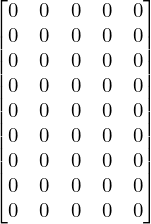

In [9]:
m22.G - m2.G

---

---

In [19]:
exec(model.model_full_q__exec)
h = vec(x, y, theta_0, psi_1, psi_2)
m1_sl = algorithms.StaticLinearization.compute(m1, h)

m1_sl.D_inv

⎡ sin(θ₀(t))   -cos(θ₀(t))                                                    
⎢ ──────────   ────────────       0             -sin(θ₁(t))                 0 
⎢     R             R                                                         
⎢                                                                             
⎢ cos(θ₀(t))    sin(θ₀(t))                                                    
⎢────────────  ────────────       0        cos(θ₁(t))⋅tan(φ₁(t))            0 
⎢R⋅cos(φ₁(t))  R⋅cos(φ₁(t))                                                   
⎢                                                                             
⎢     0             0             0                  1                      0 
⎢                                                                             
⎢ sin(θ₀(t))   -cos(θ₀(t))                                                    
⎢ ──────────   ────────────       0                  0                 -sin(θ₂
⎢     R             R                               

In [20]:
SympyDumpable.save('/tmp/saved', {'model': m1, 'static': m1_sl})

In [21]:
mm1, mm1_sl = SympyDumpable.load('/tmp/saved', [('model', model.Model), ('static', algorithms.StaticLinearization)])

In [22]:
mm1.G

⎡ R⋅sin(θ₀(t))   R⋅cos(φ₁(t))⋅cos(θ₀(t))  R⋅(-sin(φ₁(t))⋅cos(θ₀(t))⋅cos(θ₁(t))
⎢                                                                             
⎢-R⋅cos(θ₀(t))   R⋅sin(θ₀(t))⋅cos(φ₁(t))  -R⋅(sin(φ₁(t))⋅sin(θ₀(t))⋅cos(θ₁(t))
⎢                                                                             
⎢                                                 ⎛                        sin
⎢                                               R⋅⎜sin(φ₁(t))⋅cos(θ₁(t)) - ───
⎢-R⋅sin(φ₂(t))       -R⋅cos(φ₁(t))                ⎝                           
⎢──────────────      ──────────────             ──────────────────────────────
⎢2⋅l⋅tan(θ₂(t))           2⋅l                                          2⋅l    
⎢                                                                             
⎢      1                    0                                           0     
⎢                                                                             
⎢      0                    1                       

In [23]:
mm1_sl.D_inv

⎡ sin(θ₀(t))   -cos(θ₀(t))                                                    
⎢ ──────────   ────────────       0             -sin(θ₁(t))                 0 
⎢     R             R                                                         
⎢                                                                             
⎢ cos(θ₀(t))    sin(θ₀(t))                                                    
⎢────────────  ────────────       0        cos(θ₁(t))⋅tan(φ₁(t))            0 
⎢R⋅cos(φ₁(t))  R⋅cos(φ₁(t))                                                   
⎢                                                                             
⎢     0             0             0                  1                      0 
⎢                                                                             
⎢ sin(θ₀(t))   -cos(θ₀(t))                                                    
⎢ ──────────   ────────────       0                  0                 -sin(θ₂
⎢     R             R                               